# Regression

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
! curl -o "data/moore.csv" "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2302  100  2302    0     0   8124      0 --:--:-- --:--:-- --:--:--  8192


In [4]:
data = pd.read_csv("data/moore.csv", header=None)

In [5]:
data.columns = ["year", "transistors"]

In [6]:
data["log_transistors"] = np.log(data["transistors"])

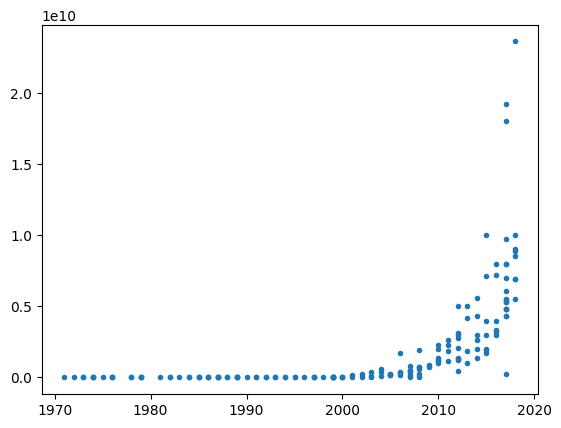

In [7]:
plt.scatter(data["year"], data["transistors"], marker=".")

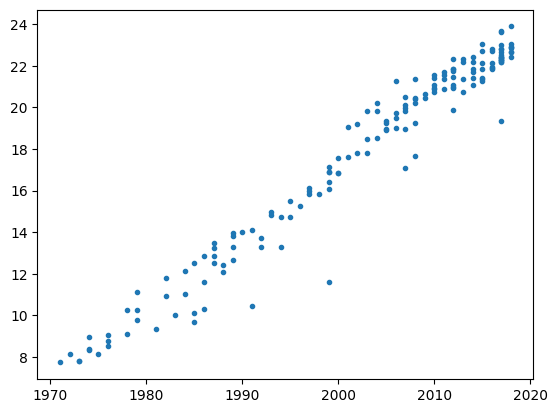

In [8]:
plt.scatter(data["year"], data["log_transistors"], marker=".")

In [9]:
filter_data = data[["year", "log_transistors"]].to_numpy()

In [10]:
train, test = train_test_split(filter_data, test_size=0.3)

In [11]:
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [12]:
x_train, y_train = train[:,0].reshape(-1, 1), train[:,1].reshape(-1, 1)

In [13]:
x_test, y_test = test[:,0].reshape(-1, 1), test[:,1].reshape(-1, 1)

## Model

In [22]:
from tensorflow.keras import Sequential
from keras.layers import Input, Dense
from keras.callbacks import LearningRateScheduler

In [23]:
model = Sequential()
model.add(Input(shape=x_test.shape[1:]))
model.add(Dense(1))

In [24]:
model.compile(optimizer="adam", loss="mse")

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
def lr_scheduler(epoch, lr):
    if epoch > 100:
        return 0.0001
    return 0.001

scheduler = LearningRateScheduler(lr_scheduler)

In [29]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, callbacks=[scheduler], batch_size=32)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1154 - val_loss: 0.1004 - learning_rate: 0.0010
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1163 - val_loss: 0.0991 - learning_rate: 0.0010
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1187 - val_loss: 0.0977 - learning_rate: 0.0010
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1144 - val_loss: 0.0963 - learning_rate: 0.0010
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1152 - val_loss: 0.0950 - learning_rate: 0.0010
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1122 - val_loss: 0.0938 - learning_rate: 0.0010
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1091 - val_loss: 0.0925 - learning_rate: 0.0010
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1056 - val_loss: 0.0913 - learning_rate: 0.0010
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0998 - val_loss: 0.0901 - learning_rate: 0.0010
Epoch 10/200
4/4 ━━━━━━━━━━━

In [30]:
print("Train MSE:", model.evaluate(x_train, y_train))
print("Test MSE:", model.evaluate(x_test, y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0417 
Train MSE: 0.0395890511572361
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0473
Test MSE: 0.04433872178196907


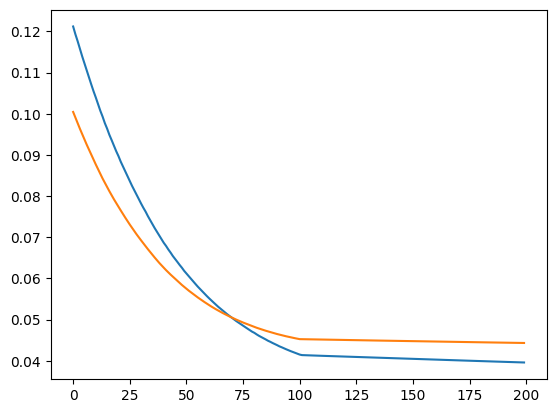

In [31]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")

In [34]:
weights = model.layers[0].get_weights()
weights

[array([[1.0533241]], dtype=float32), array([-6.7644665e-05], dtype=float32)]

In [40]:
m = weights[0].item()
m

1.0533241033554077

In [41]:
q = weights[1].item()
q

-6.764466525055468e-05

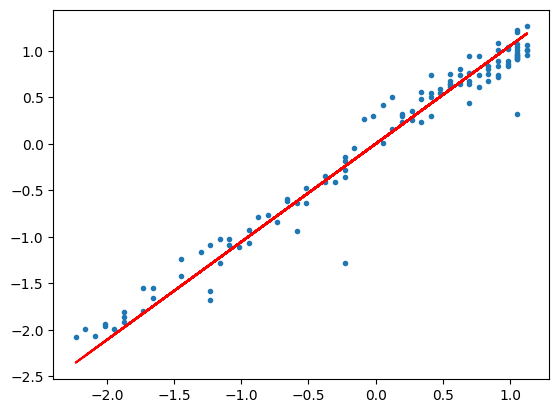

In [46]:
plt.scatter(x_train, y_train, label="points", marker=".")
plt.plot(x_train, m*x_train+q, c="r", label="prediction line")